<Body>   
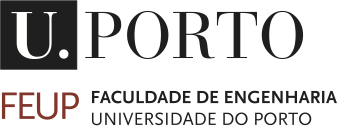   
<h1> <b>Control and Optimization 2023/2024 (2<sup>nd</sup> semester) </b> </h1>
<p>Master in Electrical and Computer Engineering </p>
<p>Department of Electrical and Computer Engineering</p>
</Body>  

**A. Pedro Aguiar** (pedro.aguiar@fe.up.pt), **M. Rosário Pinho** (mrpinho@fe.up.pt)



FEUP, Fev. 2024

---


# **Notebook #04: Lyapunov Stability**


#1- Rotated Rigid Spacecraft





## **Activity 1**

The Euler equations of a rotating rigid spacecraft are given by

\begin{align*}
J_1\dot{\omega}_1&=(J_2-J_3)\omega_2\omega_3+u_1\\
J_2\dot{\omega}_2&=(J_3-J_1)\omega_3\omega_1+u_2\\
J_3\dot{\omega}_3&=(J_1-J_2)\omega_1\omega_2+u_3
\end{align*}

where $\omega_1$ to $\omega_3$ are the components of the angular velocity vector $\boldsymbol{\omega}=(\omega_1, \omega_2, \omega_3)$ along the principal axes, $u_1$ to $u_3$ are the torque inputs applied about the principal axes, and $J_1$ to $J_3$ are the principal moments of inertia.


**1.1**
Prove that with $u_1=u_2=u_3=0$ the origin $\boldsymbol{\omega} =\mathbf{0}$ is globally stable. Is it globally asymptotically stable?

In [28]:
import sympy as sp
import numpy as np

# Define symbolic variables with 'w' instead of 'omega'
t, J1, J2, J3 = sp.symbols('t J1 J2 J3')
w1, w2, w3 = sp.symbols('w1 w2 w3')
u1, u2, u3 = sp.symbols('u1 u2 u3', function=True)

# Define the system derivatives
w1_dev = ((J2 - J3) * w2 * w3 + u1)/J1
w2_dev = ((J3 - J1) * w3 * w1 + u1)/J2
w3_dev = ((J1 - J2) * w1 * w2 + u3)/J3


# Display the equations
print("w1_dev", w1_dev)
print("w2_dev", w2_dev)
print("w3_dev", w3_dev)
print()


# Solve the system for the equilibrium point where u1=u2=u3=0
w1_dev = w1_dev.subs({u1: 0, u2: 0, u3: 0, w1:0, w2:0, w3:0})
w2_dev = w2_dev.subs({u1: 0, u2: 0, u3: 0, w1:0, w2:0, w3:0})
w3_dev = w3_dev.subs({u1: 0, u2: 0, u3: 0, w1:0, w2:0, w3:0})

w_dev = np.array([w1_dev, w2_dev, w3_dev])

# Display the equilibrium point
if (w1_dev == 0 and w2_dev == 0 and w3_dev == 0):
    print("Equilibrium point")

print(w_dev)

print()
print("This not enough to prove GAS")




w1_dev (u1 + w2*w3*(J2 - J3))/J1
w2_dev (u1 + w1*w3*(-J1 + J3))/J2
w3_dev (u3 + w1*w2*(J1 - J2))/J3

Equilibrium point
[0 0 0]

This not enough to prove GAS


**1.2**
Confirm the results through simulation by plotting the **time-evolution** of the state and in the **phase space** for different initial conditions with $u = 0$.

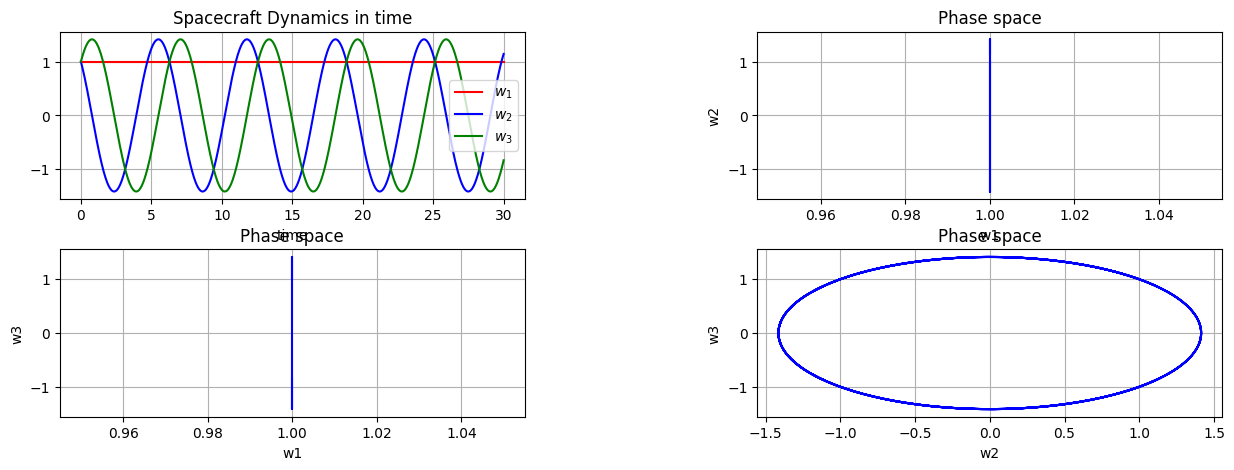

In [29]:
# To complete


import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt
# show plots in notebook
# matplotlib inline

# parameters
J1, J2, J3 = 1, 0.5, 0.5

# vector field
def Sys_f(x, t=0):
  return np.array([(J2-J3)/J1*x[1]*x[2],
                   (J3-J1)/J2*x[0]*x[2],
                   (J1-J2)/J3*x[0]*x[1]
                   ])

# generate 1000 linearly spaced points for t
t_end=30
t = np.linspace(0, t_end,  1000)

# initial values:
x0 = np.array([1.0, 1.0, 1.0])

#  integrate.odeint
x, infodict = integrate.odeint(Sys_f, x0, t, full_output=True)
# infodict['message']                      # integration successful

w1,w2, w3 = x.T

#plot
fig = plt.figure(figsize=(15,5))
fig.subplots_adjust(wspace = 0.5, hspace = 0.3)
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

ax1.plot(t, w1, 'r-', label='$w_1$')
ax1.plot(t, w2, 'b-', label='$w_2$')
ax1.plot(t, w3, 'g-', label='$w_3$')
ax1.set_title("Spacecraft Dynamics in time")
ax1.set_xlabel("time")
ax1.grid()
ax1.legend(loc='best')

ax2.plot(w1, w2, color="blue")
ax2.set_xlabel("w1")
ax2.set_ylabel("w2")
ax2.set_title("Phase space")
ax2.grid()

ax3.plot(w1, w3, color="blue")
ax3.set_xlabel("w1")
ax3.set_ylabel("w3")
ax3.set_title("Phase space")
ax3.grid()

ax4.plot(w2, w3, color="blue")
ax4.set_xlabel("w2")
ax4.set_ylabel("w3")
ax4.set_title("Phase space")
ax4.grid()


**1.3**
Suppose now that the torque inputs are given by the feedback control law

$$
u_i=-k_i\omega_i, \quad k_i>0, \quad i =1,2,3
$$

Prove that the origin of the close loop system is Globally Asymptotically Stable (GAS).

**1.4**
Confirm the results through simulation by plotting the **time-evolution** of the state and in the **phase space** for different initial conditions. Check also what happens when the feedback gains increase and/or decrease.

Integration successful.


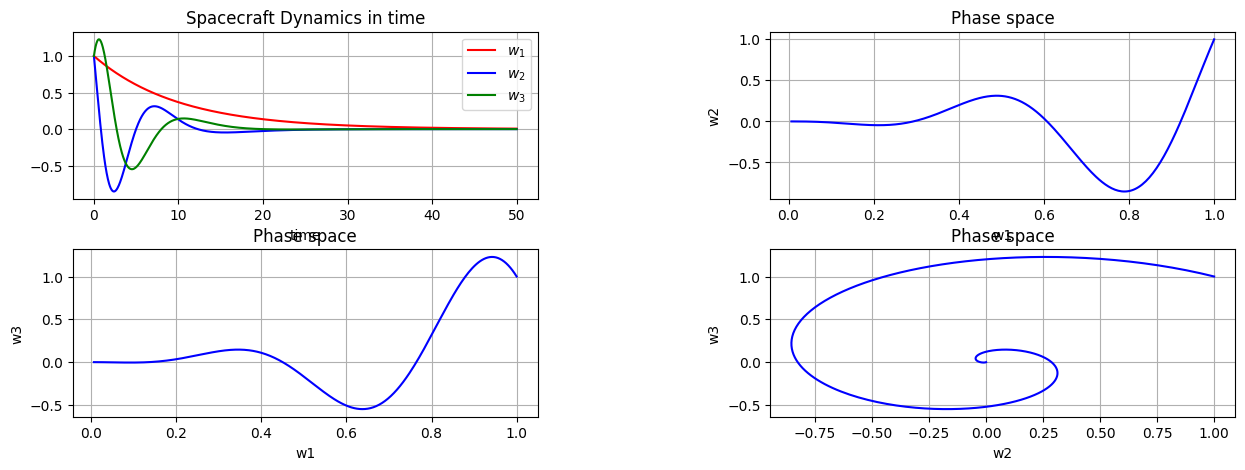

In [30]:
# To complete

import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt
# show plots in notebook
# matplotlib inline

# parameters
J1, J2, J3 = 1, 0.5, 0.5

k1, k2, k3 = 0.1, 0.1, 0.1
#k1, k2, k3 = 0.5, 0.5, 0.5

# vector field
def Sys_f(x, t=0):
  return np.array([(J2-J3)/J1*x[1]*x[2]-k1/J1*x[0],
                   (J3-J1)/J2*x[0]*x[2]-k2/J2*x[1],
                   (J1-J2)/J3*x[0]*x[1]-k3/J3*x[2]
                   ])

# generate 1000 linearly spaced points for t
t_end=50
t = np.linspace(0, t_end,  1000)

# initial values:
x0 = np.array([1.0, 1.0, 1.0])

#  integrate.odeint
x, infodict = integrate.odeint(Sys_f, x0, t, full_output=True)
print(infodict['message'])                      # integration successful

w1,w2, w3 = x.T

#plot
fig = plt.figure(figsize=(15,5))
fig.subplots_adjust(wspace = 0.5, hspace = 0.3)
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

ax1.plot(t, w1, 'r-', label='$w_1$')
ax1.plot(t, w2, 'b-', label='$w_2$')
ax1.plot(t, w3, 'g-', label='$w_3$')
ax1.set_title("Spacecraft Dynamics in time")
ax1.set_xlabel("time")
ax1.grid()
ax1.legend(loc='best')

ax2.plot(w1, w2, color="blue")
ax2.set_xlabel("w1")
ax2.set_ylabel("w2")
ax2.set_title("Phase space")
ax2.grid()

ax3.plot(w1, w3, color="blue")
ax3.set_xlabel("w1")
ax3.set_ylabel("w3")
ax3.set_title("Phase space")
ax3.grid()

ax4.plot(w2, w3, color="blue")
ax4.set_xlabel("w2")
ax4.set_ylabel("w3")
ax4.set_title("Phase space")
ax4.grid()



**1.5**
Consider now the case

\begin{align*}
u_1 &= -k_1 \omega_1, \quad k_1>0 \\
u_2 &= 0 \\
u_3 &= 0
\end{align*}

What can you say about the stability of the origin? Use LaSalle's theorem to analyze the convergence to other points.

**1.6**
Confirm the results through simulation by plotting the **time-evolution** of the state and in the **phase space** for different initial conditions.

Integration successful.


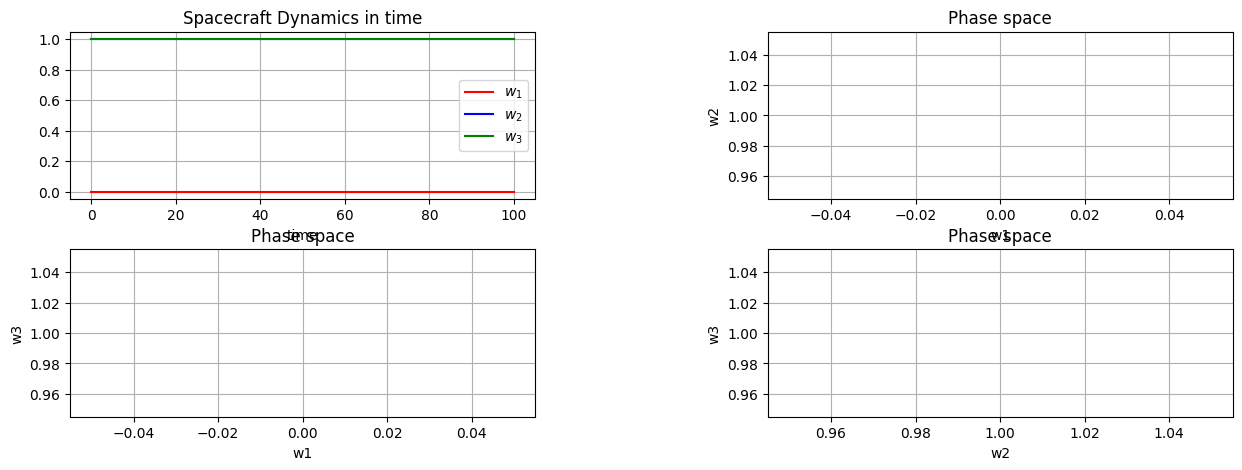

In [44]:
# To complete


import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt
# show plots in notebook
# matplotlib inline

# parameters
J1, J2, J3 = 1, 0.5, 0.5
#J1, J2, J3 = 1, 1.0, 0.5  #now with J2 not equal to J3 which implies that w2 or w3 or (both) should go to zero

k1, k2, k3 = .1, 0, 0
#k1, k2, k3 = 0.5, 0.5, 0.5

# vector field
def Sys_f(x, t=0):
  return np.array([(J2-J3)/J1*x[1]*x[2]-k1/J1*x[0],
                   (J3-J1)/J2*x[0]*x[2]-k2/J2*x[1],
                   (J1-J2)/J3*x[0]*x[1]-k3/J3*x[2]
                   ])

# generate 1000 linearly spaced points for t
t_end=100
t = np.linspace(0, t_end,  1000)

# initial values:
x0 = np.array([0, 1.0, 1.0])

#  integrate.odeint
x, infodict = integrate.odeint(Sys_f, x0, t, full_output=True)
print(infodict['message'])                      # integration successful

w1,w2, w3 = x.T

#plot
fig = plt.figure(figsize=(15,5))
fig.subplots_adjust(wspace = 0.5, hspace = 0.3)
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

ax1.plot(t, w1, 'r-', label='$w_1$')
ax1.plot(t, w2, 'b-', label='$w_2$')
ax1.plot(t, w3, 'g-', label='$w_3$')
ax1.set_title("Spacecraft Dynamics in time")
ax1.set_xlabel("time")
ax1.grid()
ax1.legend(loc='best')

ax2.plot(w1, w2, color="blue")
ax2.set_xlabel("w1")
ax2.set_ylabel("w2")
ax2.set_title("Phase space")
ax2.grid()

ax3.plot(w1, w3, color="blue")
ax3.set_xlabel("w1")
ax3.set_ylabel("w3")
ax3.set_title("Phase space")
ax3.grid()

ax4.plot(w2, w3, color="blue")
ax4.set_xlabel("w2")
ax4.set_ylabel("w3")
ax4.set_title("Phase space")
ax4.grid()




#2- Other exercises




**2.1**
Show that the origin of the system

\begin{align*}
\dot x_1 &= -x_1 +x_2 \\
\dot x_2 &= -x_2 - x_2^3
\end{align*}

is GAS.

In [32]:
# To complete